## Experimento de selección 5 halton patches para la imagen 2+_8

In [1]:
import os
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from matplotlib import pyplot as plt

In [2]:
base_dir = "/home/rpezoa/experiment_data/"
output_dir = base_dir + "output/"
images = ["1+_20", "1+_25", "2+_1", "2+_8", "2+_9", "3+_19"]
type_im = ["1+","1+","2+","2+","2+", "3+"]
seeds = [0,1,2,3,4,5,6,7,8,9]
n_images = len(images)
images_dir = [None] * n_images

classifiers=["deep_0_cross", "extra_trees_0_cross","knn_0_cross","rf_0_cross", "svm_0"]
#classifiers=["knn_0_cross","rf_0_cross", "svm_0"]

In [3]:
n_seeds = 10
n_im = len(images)
n_class = len(classifiers)
f1 = np.zeros((n_im,n_seeds,n_class))
prec = np.zeros((n_im,n_seeds,n_class))
rec = np.zeros((n_im,n_seeds,n_class))


for c,clf in enumerate(classifiers):
    print("classifier:", clf)
    for i in range(n_im):
        path = "/home/rpezoa/experiment_data/output/" + images[i]+ "_rpr_random_patches/"
        #f = os.listdir(path)
        #print(f)
        big_target_path="/home/rpezoa/experiment_data/big_" + type_im[i] + "/labels/" + images[i] + ".npy"
        big_y0=np.load(big_target_path)
        for j in range(n_seeds):

            big_pred = np.load(path + clf + '/big_pred/' + str(j) + '_big_pred.npy')
            f1[i,j,c] = f1_score(big_y0,big_pred)
            prec[i,j,c] = precision_score(big_y0,big_pred)
            rec[i,j,c] = recall_score(big_y0,big_pred)
            #print(classification_report(big_y0,big_pred))
                

classifier: deep_0_cross


/home/rpezoa/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/rpezoa/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


classifier: extra_trees_0_cross
classifier: knn_0_cross
classifier: rf_0_cross
classifier: svm_0


## Creating new matrix with 60 rows (6 images* 10 seeds x 5 classifiers )

In [4]:
n_runs = n_seeds*n_im
f1_imgs_clfs = np.reshape(f1, (n_runs,n_class))
print(f1_imgs_clfs.shape)

(60, 5)


## Boxplot performance per classifier

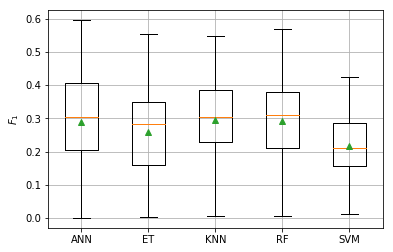

In [6]:
plt.figure()
plt.boxplot(f1_imgs_clfs,showmeans=True)
plt.xticks(range(1,6),["ANN", "ET", "KNN", "RF", "SVM"])
plt.grid()
plt.ylabel("$F_1$")
plt.show()

[ 0.28994222  0.25882235  0.29493741  0.29055318  0.21804166]


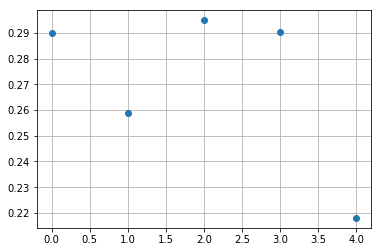

In [14]:
means = np.zeros((len(classifiers)))
for c in range(len(classifiers)):
    means[c] = f1[:,:,c].mean()
    
print(means)
plt.figure()
plt.plot(means,'o')
plt.grid()
plt.show()

[ 0.43413895  0.42705822  0.37956516  0.4210705   0.26104318]


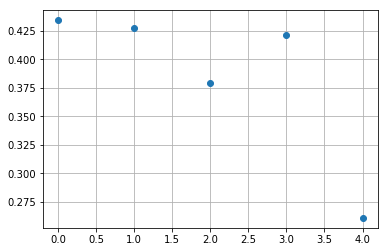

In [15]:
means = np.zeros((len(classifiers)))
for c in range(len(classifiers)):
    means[c] = prec[:,:,c].mean()
    
print(means)
plt.figure()
plt.plot(means,'o')
plt.grid()
plt.show()

In [16]:
np.save("/home/rpezoa/experiment_data/output/f1_random.npy",f1)
np.save("/home/rpezoa/experiment_data/output/prec_random.npy",prec)